# Regreesion

## Linear Regression
* 데이터의 값을 예측하는 데이터 분석 기법

### 농어의 무게 예측
* 길이로 무게 예측

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns     

import matplotlib.pyplot as plt   
import matplotlib as mpl          
mpl.rc('font', family='Malgun Gothic ')     
plt.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# 입력 데이터 : 길이
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]) 

# 정답 데이터 : 무게
perch_weight=np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
                     1000.0, 1000.0]) 

perch_length.shape, perch_weight.shape

((56,), (56,))

#### 훈련 & 테스트 세트

In [9]:
# 훈련, 테스트 데이터 세트
X_train, X_test, Y_train, Y_test=train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 변환 및 확인
X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
X_train.shape, X_test.shape

((42, 1), (14, 1))

#### 모델 훈련 및 평가

In [58]:
# 선형회귀 학습
lr=LinearRegression()
lr.fit(X_train, Y_train)

print("학습:", lr.score(X_train, Y_train))
print("일반화:", lr.score(X_test, Y_test))    # 과대적합인가? 과소적합인가?

학습: 0.939846333997604
일반화: 0.8247503123313558


In [60]:
# 기울기와 절편 /  인터셉트, 코에피션츠
print("절편:", lr.intercept_)
print("기울기:", lr.coef_)

절편: -709.0186449535477
기울기: [39.01714496]


In [115]:
# 새로운 데이터 예측
print(lr.predict([[50]]))                   # 농어 50cm 무게 - 1,241g
print(lr.predict([[100]]))                  # 농어 100cm 무게 - 3,192g

[1241.83860323]
[3192.69585141]


<Axes: >

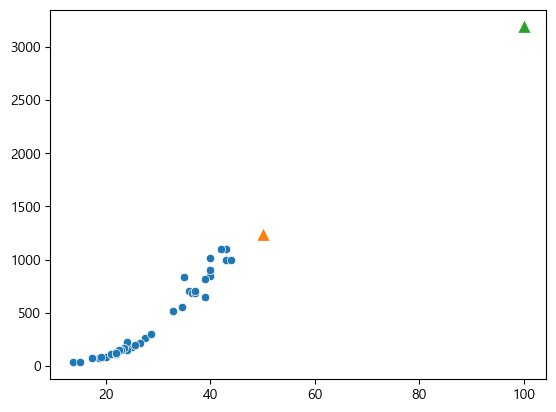

In [116]:
# 시각화
sns.scatterplot(x=X_train[:, 0], y=Y_train)      # sns.regplot(x=X_train[:, 0], y=Y_train)
sns.scatterplot(x=[50], y=[1241], marker='^', s=100)
sns.scatterplot(x=[100], y=[3192], marker='^', s=100)

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl     
mpl.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus']=False

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

### 실습문제(Linear Regression) - 매체별 광고와 판매량 분석
* https://www.kaggle.com/datasets/ashydv/advertising-dataset

#### 데이터 전처리

In [39]:
adver=pd.read_csv('./Data/supervised/advertising.csv')   
adver.shape      # (200, 4)
adver.head()     # 특성 3개, 정답 1
adver.info()     # 데이터 타입, 결측치, 이상치 Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
adver.describe().T.astype(int)      # 기술 통계량

,count,mean,std,min,25%,50%,75%,max
TV,200,147,85,0,74,149,218,296
Radio,200,23,14,0,9,22,36,49
Newspaper,200,30,21,0,12,25,45,114
Sales,200,15,5,1,11,16,19,27


#### 시각화

<Axes: xlabel='Sales', ylabel='Count'>

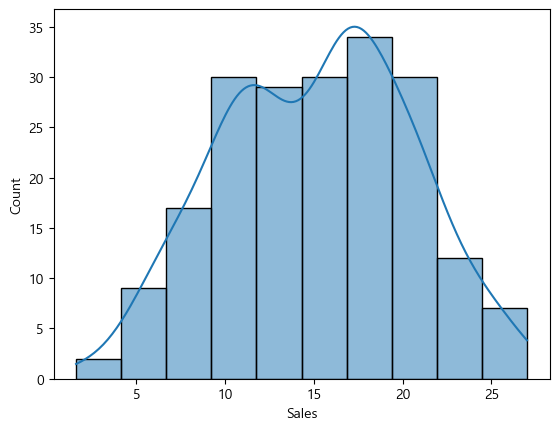

In [46]:
sns.histplot(data=adver, x='Sales', kde=True)

<Axes: xlabel='TV', ylabel='Sales'>

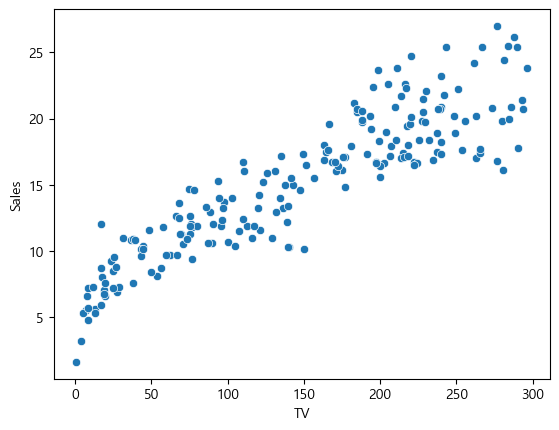

In [5]:
sns.scatterplot(data=adver, x='TV', y='Sales')

<Figure size 1000x600 with 0 Axes>

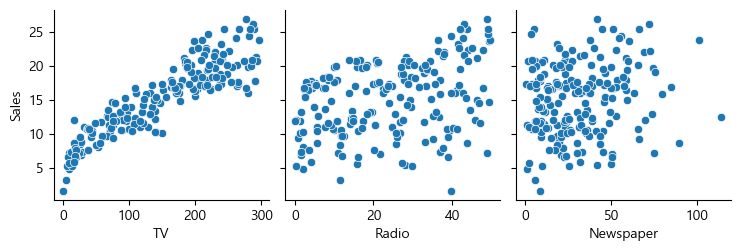

In [6]:
# sns.pairplot(adver)

plt.figure(figsize=(10, 6))
sns.pairplot(data=adver, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

#### 상관 관계
- 0.3 낮은 상관
- 0.3 ~ 0.7 보통
- 0.7  강한 상관

In [10]:
# 또는
# np.corrcoef(adver)
# np.corrcoef(adver, rowvar=False)

adver.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


<Axes: >

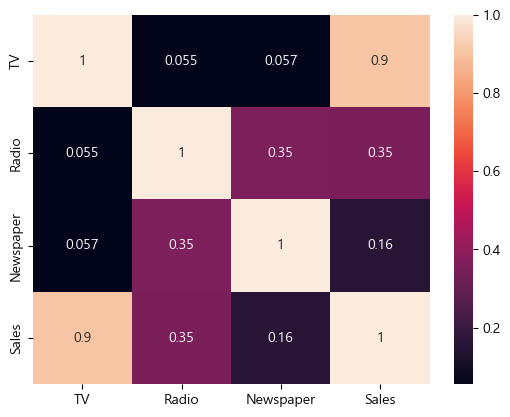

In [11]:
sns.heatmap(adver.corr(), annot=True)

#### 모델 훈련

In [65]:
# 설명변수, 목표변수
adver_input=adver['TV'].values.reshape(-1, 1)    
adver_target=adver['Sales'].values
adver_input.shape, adver_target.shape

((200, 1), (200,))

In [67]:
X_train, X_test, Y_train, Y_test=train_test_split(adver_input, adver_target, random_state=42)
lr=LinearRegression()
lr.fit(X_train, Y_train)

print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.811194552365148
0.7971876919875108


In [69]:
print("절편:", lr.intercept_)   # 절편
print("기울기:", lr.coef_)      # 기울기

절편: 7.098853680118275
기울기: [0.05538653]


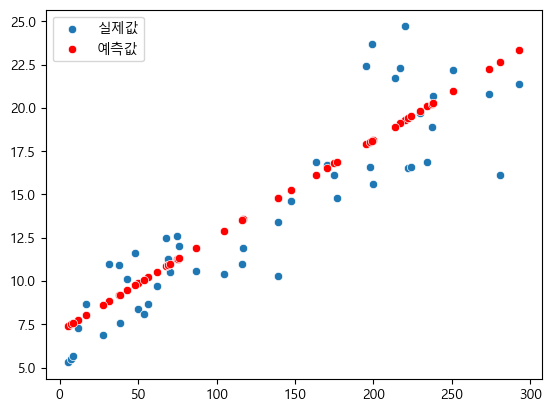

In [71]:
X_test_pred=lr.predict(X_test)

sns.scatterplot(x=X_test[:, 0], y=Y_test, label="실제값")
sns.scatterplot(x=X_test[:, 0], y=X_test_pred, color='red', label="예측값")
plt.legend()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

#### 평가 지표
* 결정계수 R^2 : 회귀선이 데이터를 얼마나 잘 대변하는가 0~1
  - 총 변동 : 합(실제값-평균)^2 / Total Sum of Square(TSS)
  - 회귀 변동 : 합(예측값-평균)^2 / Explained Sum of Square(ESS), Regression Sum of Square
  - 오차 변동 : 합(실제값-예측값)^2 / Residual Sum of Square(RSS), Error Sum of Square
* MSE (Mean Square Error) : 합(실제값-예측값)^2 / 데이터 수
* RMSE (Root Mean Square Error) : MSE 루트
* MAE (Mean Absolute Error) : 합|실제값-예측값|/ 데이터 수

In [17]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

# R^2 : 0~1 사이를 가지며, 1에 가까울수록 모델의 예측력이 좋다.
print("학습 R2:", r2_score(Y_train, Y_train_pred))             # lr.scor() 동일
print("일반화 R2:", r2_score(Y_test, Y_test_pred), "\n")

# 오차 평균 : 값이 낮을 수록 좋다. (10이하면 좋은 모델)
print("학습 MSE:", mean_squared_error(Y_train, Y_train_pred))
print("일반화 MSE:", mean_squared_error(Y_test, Y_test_pred), "\n")

print("학습 RMSE:", root_mean_squared_error(Y_train, Y_train_pred))
print("일반화 RMSE:", root_mean_squared_error(Y_test, Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("일반화 MAE:", mean_absolute_error(Y_test, Y_test_pred))

학습 R2: 0.811194552365148
일반화 R2: 0.7971876919875108 

학습 MSE: 5.136151288979386
일반화 MSE: 5.513351187165511 

학습 RMSE: 2.2663078539729296
일반화 RMSE: 2.3480526372220685 

학습 MAE: 1.8203818541994503
일반화 MAE: 1.8651146911099161


## Multiple Linear Regression
### 나라별 기대 수명 예측
* https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl  
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

In [27]:
# 데이터 전처리
life=pd.read_csv('./Data/supervised/life_expectancy.csv')
life.shape     # (2938, 22)
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
life.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

### 결측치 처리
1. 나라별로 집계 되지 않는 데이터 존재하며 결측 데이터가 상당히 많음
2. 결측치 처리 고민 ? 기술 통계량 확인 / 중위값, 평균값, 임의 수로 대체...
3. 상관 관계 >> 관련 필드 추출 >> 새로운 DataFrame >> 기술 통계량 >> 결측치 처리

In [32]:
life.isna().sum()      # 결측 데이터가 상당히 많음

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### 상관관계

In [35]:
# 데이터프레임에서 숫자형 데이터를 포함한 열을 선택
corr_life=life.select_dtypes(include='number')   
# corr_life.info()

# 절대값, 소수점, 상관관계 정렬
corr_data=corr_life.corr().round(2)['Life expectancy'].abs()   # 기대수면 상관계수
corr_sort=corr_data.sort_values(ascending=False)
corr_sort

# 상관계수 r >=0.7 / 0.3 <=  r < 0.7 / r < 0.3

Life expectancy                    1.00
Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Thinness 5-9 years                 0.47
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
Percentage expenditure             0.38
Hepatitis B                        0.26
Under-five deaths                  0.22
Total expenditure                  0.22
Infant deaths                      0.20
Year                               0.17
Measles                            0.16
Population                         0.02
Name: Life expectancy, dtype: float64

In [37]:
# 내림차순 정렬의 해당 idx 값 추출
idx=corr_sort[0:10].index        
idx

life_corr=life[idx]
life_corr.info()             # 설명변수 내용은 PPT 참조

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Schooling                        2775 non-null   float64
 2   Income composition of resources  2771 non-null   float64
 3   Adult mortality                  2928 non-null   float64
 4   BMI                              2904 non-null   float64
 5   HIV/AIDS                         2938 non-null   float64
 6   Thinness 1-19 years              2904 non-null   float64
 7   Diphtheria                       2919 non-null   float64
 8   Thinness 5-9 years               2904 non-null   float64
 9   Polio                            2919 non-null   float64
dtypes: float64(10)
memory usage: 229.7 KB


In [39]:
life_corr.isna().sum()

Life expectancy                     10
Schooling                          163
Income composition of resources    167
Adult mortality                     10
BMI                                 34
HIV/AIDS                             0
Thinness 1-19 years                 34
Diphtheria                          19
Thinness 5-9 years                  34
Polio                               19
dtype: int64

In [33]:
life_corr.describe().T.astype(int)         # 기술 통계 확인 후 결측치, 이상치 처리

,count,mean,std,min,25%,50%,75%,max
Life expectancy,2928,69,9,36,63,72,75,89
Schooling,2775,11,3,0,10,12,14,20
Income composition of resources,2771,0,0,0,0,0,0,0
Adult mortality,2928,164,124,1,74,144,228,723
BMI,2904,38,20,1,19,43,56,87
HIV/AIDS,2938,1,5,0,0,0,0,50
Thinness 1-19 years,2904,4,4,0,1,3,7,27
Diphtheria,2919,82,23,2,78,93,97,99
Thinness 5-9 years,2904,4,4,0,1,3,7,28
Polio,2919,82,23,3,78,93,97,99


In [34]:
# 결측치 처리
life_df=life_corr.copy()
life_df.fillna(life_df.mean(), inplace=True)   # 결측치를 각 열의 평균으로 대체
life_df.isna().sum()

Life expectancy                    0
Schooling                          0
Income composition of resources    0
Adult mortality                    0
BMI                                0
HIV/AIDS                           0
Thinness 1-19 years                0
Diphtheria                         0
Thinness 5-9 years                 0
Polio                              0
dtype: int64

### 시각화

In [35]:
life_df.columns

Index(['Life expectancy', 'Schooling', 'Income composition of resources',
       'Adult mortality', 'BMI', 'HIV/AIDS', 'Thinness 1-19 years',
       'Diphtheria', 'Thinness 5-9 years', 'Polio'],
      dtype='object')

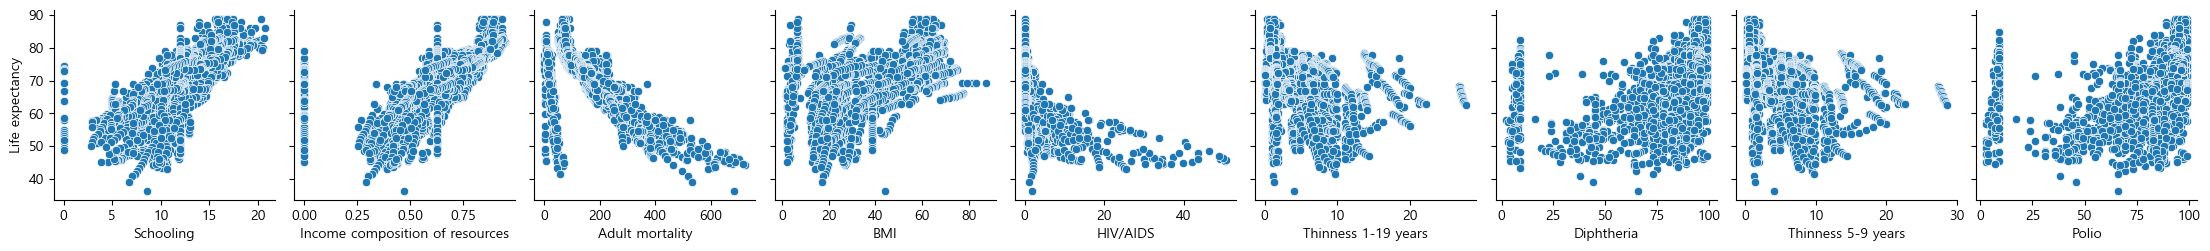

In [36]:
col=['Schooling', 'Income composition of resources',
       'Adult mortality', 'BMI', 'HIV/AIDS', 'Thinness 1-19 years',
       'Diphtheria', 'Thinness 5-9 years', 'Polio']

sns.pairplot(data=life_df, x_vars=col, y_vars='Life expectancy')

### 모델 훈련

In [37]:
# 설명변수, 목표변수
X=life_df[col]
Y=life_df['Life expectancy']
X.shape, Y.shape

((2938, 9), (2938,))

In [43]:
# 학습 및 테스트 데이터
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_scaled, Y_train)

# 평가
print("학습:", lr.score(X_train_scaled, Y_train))
print("일반화:", lr.score(X_test_scaled, Y_test))

학습: 0.8002007648036908
일반화: 0.7962053773778238


### 평가 지표

In [44]:
Y_train_pred=lr.predict(X_train_scaled)
Y_test_pred=lr.predict(X_test_scaled)

# R^2 : 0~1 사이를 가지며, 1에 가까울수록 모델의 예측력이 좋다.
print("학습 R2:", r2_score(Y_train, Y_train_pred))
print("일반화 R2:", r2_score(Y_test, Y_test_pred), "\n")

# 오차 평균 : 값이 낮을 수록 좋다. (10이하면 좋은 모델)
print("학습 MSE:", mean_squared_error(Y_train, Y_train_pred))
print("일반화 MSE:", mean_squared_error(Y_test, Y_test_pred), "\n")

print("학습 RMSE:", root_mean_squared_error(Y_train, Y_train_pred))
print("일반화 RMSE:", root_mean_squared_error(Y_test, Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("일반화 MAE:", mean_absolute_error(Y_test, Y_test_pred))

학습 R2: 0.8002007648036908
일반화 R2: 0.7962053773778238 

학습 MSE: 18.06538827982733
일반화 MSE: 18.348077207731706 

학습 RMSE: 4.250339784044016
일반화 RMSE: 4.283465560469899 

학습 MAE: 3.1383510048400836
일반화 MAE: 3.107491734368555


# Polynomial Regression
* 다항회귀
* 2차 방식
* 변곡점 마다 제곱

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns     

import matplotlib.pyplot as plt   
import matplotlib as mpl          
mpl.rc('font', family='Malgun Gothic ')     

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures        # 폴리노미얼 피처스

In [52]:
# 다항 회귀 - 농어 무게

perch_length=np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight=np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

<Axes: >

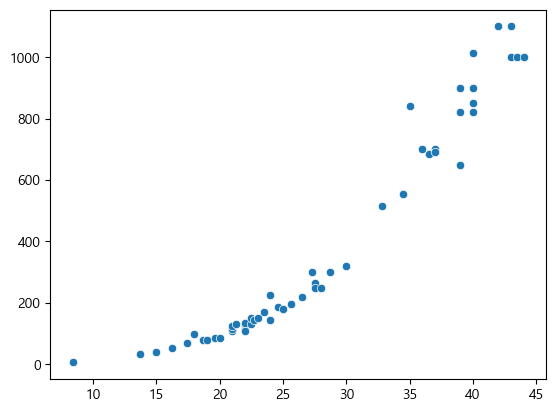

In [54]:
sns.scatterplot(x=perch_length, y=perch_weight)
# sns.regplot(x=perch_length, y=perch_weight)

# 곡선에 가깝다. 
# 예측 4번 참조 : 0.939846333997604 / 0.8247503123313558

In [57]:
# 독립 변수의 제곱, 세제곱, 네제곱 등과 같은 고차항을 추가하여 비선형성을 모델링
# 이렇게 함으로써 모델은 더 복잡한 데이터 패턴을 캡처할 수 있게 된다.
# 사이킷런에서는 다항회귀 클래스를 제공하지 않는다.

X_train, X_test, Y_train, Y_test=train_test_split(perch_length, perch_weight, random_state=42)

# 2차 방정식 
# 1차원 배열(벡터)들을 열(column) 방향으로 쌓아 2차원 배열(행렬)로 변환
X_train_ploy=np.column_stack((X_train ** 2, X_train))   
X_test_ploy=np.column_stack((X_test ** 2, X_test))

print(X_train_ploy.shape, X_test_ploy.shape)
print(X_train_ploy[:5])

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]


In [59]:
lr=LinearRegression()
lr.fit(X_train_ploy, Y_train)

print("학습:", lr.score(X_train_ploy, Y_train))
print("일반화:", lr.score(X_test_ploy, Y_test))   # 과소적합(Underfitting) : 테스트 점수가 더 높다 또는 두 점수 모두 낮다.

학습: 0.9706807451768623
일반화: 0.9775935108325121


In [61]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [63]:
# 회귀계수 : 기울기와(X^2, X) 절편
print(lr.coef_, lr.intercept_)     

[  1.01433211 -21.55792498] 116.05021078278259


<Axes: xlabel='length', ylabel='weight'>

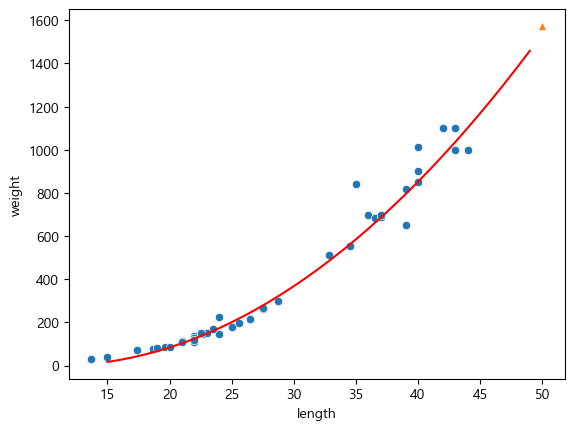

In [65]:
plt.xlabel('length')
plt.ylabel('weight')

sns.scatterplot(x=X_train, y=Y_train)          # 훈련셋 산점도
sns.scatterplot(x=[50], y=[1574], marker='^')  # 50cm 농어 데이터 

# 2차 방정식 그래프
point=np.arange(15, 50)      # 구간별 직선을 그리기 위해서 15 ~ 49 정수 배열
sns.lineplot(x=point, y=1.0*point**2 - 21.6*point + 116.05, c='red')    # 기울기*point**2 - 기울기*point + 졀편)

## 사이킷런의 변환기

In [68]:
from sklearn.preprocessing import PolynomialFeatures  

In [70]:
data=[[2, 3]]

poly=PolynomialFeatures()
poly.fit(data)

# 다변수 다항식 
poly.transform(data)   #   # 1:절편, 2:데이터, 3:데이터, 4:2^2, 6:2*3(특성끼리 곱), 9:3^2

# 특성끼리 곱 : 특성 간의 관계를 반영
# 어떤 변수들이 독립적으로 영향을 주는 것이 아니라,
# 두 변수의 조합이 결과값에 영향을 미치는 경우 이를 반영해야 함.
# 농업에서 비료 사용량과 물 공급량이 동시에 영향을 주는 경우

array([[1., 2., 3., 4., 6., 9.]])

In [72]:
data=[[2, 3]]

poly=PolynomialFeatures(include_bias=False)   # 절편 사용하지 않겠다. (LinearRegression 모델에서)
poly.fit(data)
poly.transform(data)  

array([[2., 3., 4., 6., 9.]])

## 농어 무게 예측 - 비선형 다중 회귀

In [75]:
## 농어 무게 예측 : 농어 (길이, 높이, 두께, 무게)
perch_df=pd.read_csv('./Data/supervised/perch_full.csv')
perch_df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [77]:
perch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  56 non-null     float64
 1   height  56 non-null     float64
 2   width   56 non-null     float64
 3   weight  56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [78]:
perch_df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,56.0,27.892857,9.021668,8.40,21.825,25.300,36.625,44.00
height,56.0,7.862143,2.878343,2.11,5.690,6.920,10.850,12.80
width,56.0,4.745536,1.775006,1.41,3.520,4.155,6.450,8.14
weight,56.0,382.239286,347.617717,5.90,120.000,207.500,692.500,1100.00


<Axes: xlabel='weight', ylabel='length/width/height'>

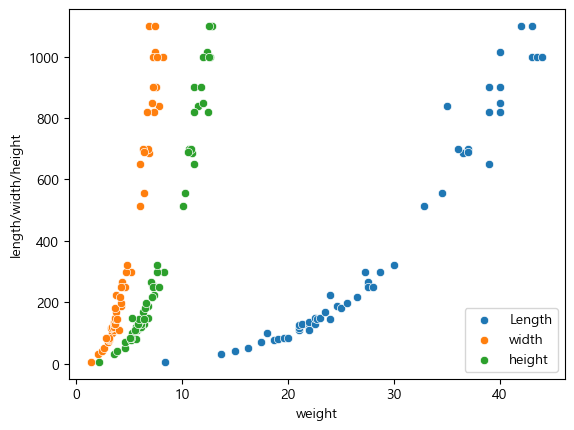

In [81]:
plt.ylabel('length/width/height')
plt.xlabel('weight')

sns.scatterplot(data=perch_df, x='length', y='weight', label='Length')
sns.scatterplot(data=perch_df, x='width', y='weight', label='width')
sns.scatterplot(data=perch_df, x='height', y='weight',  label='height')

# sns.pairplot(perch_df)

<Axes: >

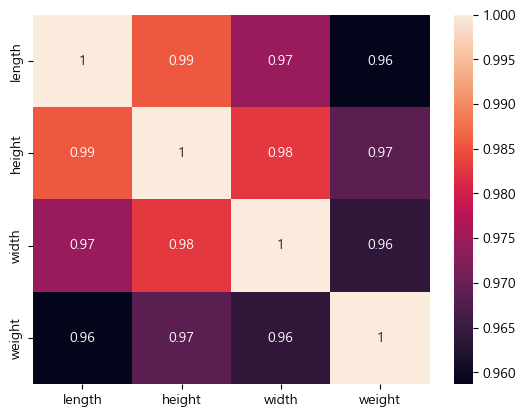

In [82]:
sns.heatmap(perch_df.corr(), annot=True)

In [85]:
# numpy 배열
perch_arr=perch_df.to_numpy()
perch_arr[:5]

array([[ 8.4 ,  2.11,  1.41,  5.9 ],
       [13.7 ,  3.53,  2.  , 32.  ],
       [15.  ,  3.82,  2.43, 40.  ],
       [16.2 ,  4.59,  2.63, 51.5 ],
       [17.4 ,  4.59,  2.94, 70.  ]])

In [87]:
# 설명변수(길이, 높이, 두께), 목표변수(무게)
perch=perch_arr[:, :3]
weight=perch_arr[:, -1]

print(perch.shape, weight.shape)
print(perch[:5])

(56, 3) (56,)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [89]:
# 훈련 세트와 테스트 세트 분할
X_train, X_test, Y_train, Y_test=train_test_split(perch, weight, random_state=42)

# 표준화
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [91]:
# 비선형 다항 회귀
poly=PolynomialFeatures(include_bias=False)    # default 2차 다항식
poly.fit(X_train_scaled)

X_train_poly=poly.transform(X_train_scaled)
print(X_train_poly.shape)     # poly.get_feature_names_out()

X_test_poly=poly.transform(X_test_scaled)
print(X_test_poly.shape)

(42, 9)
(14, 9)


In [93]:
# 모델
lr=LinearRegression()
lr.fit(X_train_poly, Y_train)

print("학습:", lr.score(X_train_poly, Y_train))
print("일반화:", lr.score(X_test_poly, Y_test))

학습: 0.9903183436982125
일반화: 0.9714559911594103


### degree 변경

In [96]:
# degree=5 변경
poly=PolynomialFeatures(include_bias=False, degree=5)    # 5차 다항식
poly.fit(X_train_scaled)

X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)

print(X_train_poly.shape)
print(X_test_poly.shape)

(42, 55)
(14, 55)


In [98]:
# 학습
lr=LinearRegression()
lr.fit(X_train_poly, Y_train)

print("학습:", lr.score(X_train_poly, Y_train))
print("일반화:", lr.score(X_test_poly, Y_test))       # Over fitting 발생 : 과적합

학습: 1.0
일반화: -1261.98109409283


## Ridg - L2규제
* 데이터 준비 >> 설명(특성)과 목표 변수 분리 >> 훈련 세트와 테스트 세트 분할
* 데이터 스케일링 >> Lasso 회귀 모델 훈련 >> 예측 및 성능 평가

In [101]:
# 데이터 준비
perch_df=pd.read_csv('./Data/supervised/perch_full.csv')

# 설명, 목표변수 분리
perch_arr=perch_df.to_numpy()
perch=perch_arr[:, :3]
weight=perch_arr[:, -1]

print(perch.shape, weight.shape)
print(perch[:5])

(56, 3) (56,)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [103]:
# 훈련세트와 테스트 세트 분할
X_train, X_test, Y_train, Y_test=train_test_split(perch, weight, random_state=42)

# 표준화
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 릿지회귀 : (가중치) ^ 2 / L2규제
ridg=Ridge()          # default 1.0
ridg.fit(X_train_scaled, Y_train)

print("학습:", ridg.score(X_train_scaled, Y_train))
print("일반화:", ridg.score(X_test_scaled, Y_test))

학습: 0.955408047293681
일반화: 0.8816154469511343


### Hypter Parameter

In [106]:
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]    # 통상적으로 10의 배수

for i in alpha_list:
    ridge=Ridge(alpha=i)                     # default alpha=1.0
    ridge.fit(X_train_scaled, Y_train)

    print(i, "--------------------------------")
    print(ridge.score(X_train_scaled, Y_train))
    print(ridge.score(X_test_scaled, Y_test))
    print()

0.001 --------------------------------
0.9559326781339945
0.8796431484410651

0.01 --------------------------------
0.9559322904176203
0.8796542272317723

0.1 --------------------------------
0.9559040229461054
0.8797703844547022

1 --------------------------------
0.955408047293681
0.8816154469511343

10 --------------------------------
0.9496602603995428
0.8967913583006972

100 --------------------------------
0.7651866611977023
0.7756202859106843



In [108]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train_scaled, Y_train)

print(ridge.score(X_train_scaled, Y_train))
print(ridge.score(X_test_scaled, Y_test))

0.9559040229461054
0.8797703844547022


## Lasso - L1 규졔

In [111]:
### 라쏘 : |가중치| / L1규제

lasso=Lasso()     # default=1.0
lasso.fit(X_train_scaled, Y_train)

print(lasso.score(X_train_scaled, Y_train))
print(lasso.score(X_test_scaled, Y_test))

0.9559242986272601
0.8805114926130045


In [113]:
# Hype paramemeter

alpha_list=[0.001, 0.01, 1.0, 1, 10, 100]    # 통상적으로 10의 배수

for i in alpha_list:
  lasso=Lasso(alpha=i)         # default alpha=1.0
  lasso.fit(X_train_scaled, Y_train)

  print(i, "------------------------------------")
  print(lasso.score(X_train_scaled, Y_train))
  print(lasso.score(X_test_scaled, Y_test))
  print()

0.001 ------------------------------------
0.9559326821789879
0.8796430866563691

0.01 ------------------------------------
0.9559326812175565
0.8796537072748237

1.0 ------------------------------------
0.9559242986272601
0.8805114926130045

1 ------------------------------------
0.9559242986272601
0.8805114926130045

10 ------------------------------------
0.9551106582086354
0.8868014920561641

100 ------------------------------------
0.873791529643831
0.8495615691532875



In [115]:
lasso=Lasso(alpha=10)
lasso.fit(X_train_scaled, Y_train)

print(lasso.score(X_train_scaled, Y_train))
print(lasso.score(X_test_scaled, Y_test))

0.9551106582086354
0.8868014920561641


## ElasticNet - L1 + L2

In [118]:
elastic_net=ElasticNet()        # default alpha=1.0, l1_ratio=0.5 (L1)
elastic_net.fit(X_train_scaled, Y_train)

print(elastic_net.score(X_train_scaled, Y_train))
print(elastic_net.score(X_test_scaled, Y_test))

0.934618853829238
0.9006259691783159


In [120]:
alpha_list=[0.001, 0.01, 1.0, 1, 10, 100] 

for i in alpha_list:
    elastic_net=ElasticNet(alpha=i)
    elastic_net.fit(X_train_scaled, Y_train)
        
    print(i, "------------------------------------")
    print(elastic_net.score(X_train_scaled, Y_train))
    print(elastic_net.score(X_test_scaled, Y_test))
    print()

0.001 ------------------------------------
0.9559310228911618
0.8796683897729037

0.01 ------------------------------------
0.9558409748391042
0.8799419250040099

1.0 ------------------------------------
0.934618853829238
0.9006259691783159

1 ------------------------------------
0.934618853829238
0.9006259691783159

10 ------------------------------------
0.5716563728116738
0.5813274058245681

100 ------------------------------------
0.08895022421176435
0.0470085332549216



# Logistic Regression
* 이진 분류 문제에 사용되는 머신러닝 
* 이름은 회귀라는 단어가 들어가지만 실제로는 분류를 수행하는 알고리즘
* 선형 방정식 학습 z = a * (Weight) +  b * (Length) +  c * (Diagonal) + d * (Height) + e * (Width) + f
* 시그모이드 함수를 사용하여 확률로 변환 0~1 

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl  
mpl.rc('font', family='Malgun Gothic')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  
from scipy.special import expit    # 스페셜
from scipy.special import softmax

In [125]:
# 데이터 불러오기
fish=pd.read_csv('./Data/supervised/fish_data.csv')
fish.shape     # (159, 6)
fish.head()

# Species(종) / Weight(무게) / Length(길이) / Diagonal(대각선) / Height(높이) / Width(폭)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [127]:
fish['Species'].value_counts()

# Perch: 쏘가리 / Bream: 빙어 / Roach: 달새기 / Pike: 강꼬치어 
# Smelt: 농어 / Parkki: 파르키 / Whitefish: 백어

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

## 이진분류 - Sigmoid 
### 데이터 전처리

In [130]:
# 도미 & 빙어 데이터 가져오기   
bream_smelt_fish=fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]
bream_smelt_fish.shape    # (49, 6)

(49, 6)

In [153]:
bream_smelt_fish['Species'].value_counts()

Species
Bream    35
Smelt    14
Name: count, dtype: int64

In [132]:
bream_smelt_fish.info()                         # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   49 non-null     object 
 1   Weight    49 non-null     float64
 2   Length    49 non-null     float64
 3   Diagonal  49 non-null     float64
 4   Height    49 non-null     float64
 5   Width     49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [134]:
bream_smelt_fish.describe().astype(int)          #  연속형 : 기술 통계량, 이상치 확인

,Weight,Length,Diagonal,Height,Width
count,49,49,49,49,49
mean,444,27,31,11,4
std,328,10,12,6,1
min,6,9,10,1,1
25%,19,14,15,2,1
50%,500,31,36,14,5
75%,700,34,39,15,5
max,1000,41,46,18,6


In [136]:
bream_smelt_fish.head(5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


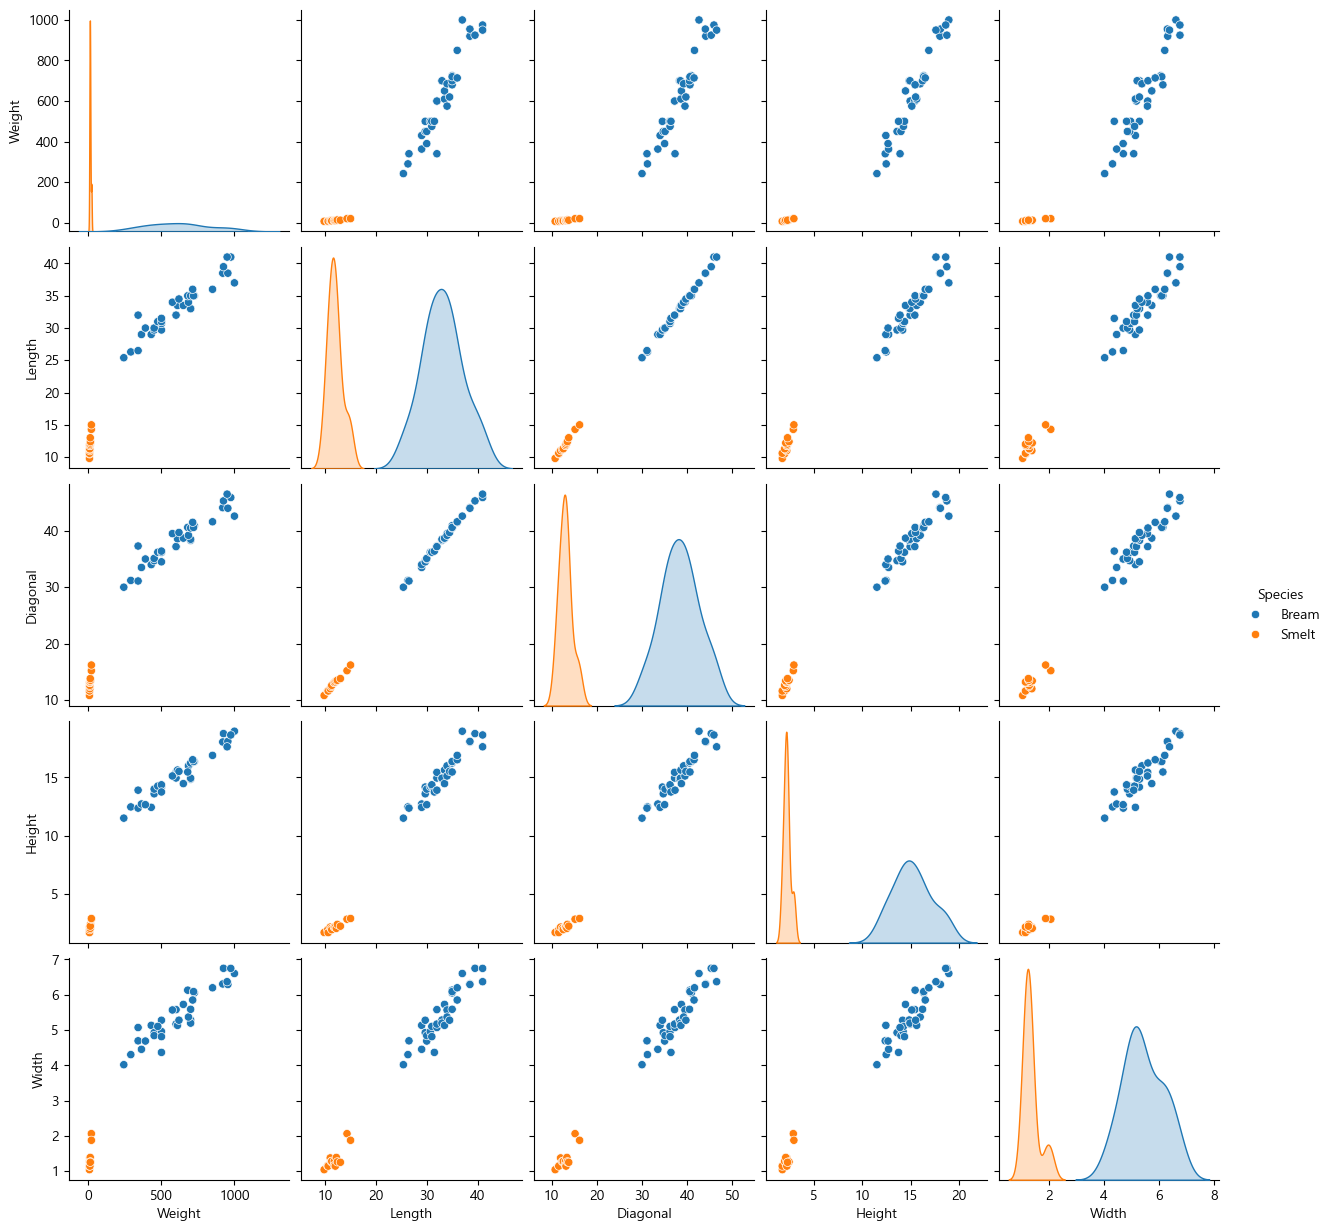

In [138]:
sns.pairplot(bream_smelt_fish, hue='Species')

In [149]:
# 설명 및 목표 변수 설정
X=bream_smelt_fish.iloc[:, 1:6]
Y=bream_smelt_fish['Species']
X.shape, Y.shape

((49, 5), (49,))

### 훈련 & 평가

In [152]:
# 학습 및 테스트 데이터 셋
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42)

# 데이터 스케일 - 표준화
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [154]:
# 로지스틱 회귀 모델 학습
lr=LogisticRegression()
lr.fit(X_train_scaled, Y_train)

print("학습:",  lr.score(X_train_scaled, Y_train))
print("일반화:", lr.score(X_test_scaled, Y_test))

학습: 1.0
일반화: 1.0


In [156]:
# 평가 지표 : 정확도, 정밀도, 재현율, f1스코어
Y_test_pred=lr.predict(X_test_scaled)
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [158]:
# 회귀 계수 확인 
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)

# z= -0.57717269 * (무게) + -0.79233938 * (길이) + -0.82533982 * (대각선) + -0.86579233 * (높이 ) + -0.82205625 * (두께) + -2.38186126

기울기: [[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]]
절편: [-2.38186126]


In [160]:
# z값 출력 
d=lr.decision_function(X_test_scaled[:5])
print(d)

# 시그모이드 함수
expit(d)    #  Bream  > 0.5  > Smelt

[-3.97673464  2.94652601  2.27774726  2.96675768 -4.97761114]


array([0.01840178, 0.95009904, 0.90701723, 0.95104955, 0.00684335])

## 다중분류 - Softmax 

### 데이터 전처리

In [162]:
# 데이터 불러오기
fish=pd.read_csv('./Data/supervised/fish_data.csv')
fish.shape     # (159, 6)
fish.head()

# Species(종) / Weight(무게) / Length(길이) / Diagonal(대각선) / Height(높이) / Width(폭)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [164]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [166]:
fish.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Weight,159,398,357,0,120,273,650,1650
Length,159,28,10,8,21,27,35,63
Diagonal,159,31,11,8,23,29,39,68
Height,159,8,4,1,5,7,12,18
Width,159,4,1,1,3,4,5,8


In [168]:
fish.describe(include='object').T

,count,unique,top,freq
Species,159,7,Perch,56


In [170]:
fish['Species'].value_counts()

# Perch: 쏘가리 / Bream: 빙어 / Roach: 달새기 / Pike: 강꼬치어 
# Smelt: 농어 / Parkki: 파르키 / Whitefish: 백어

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

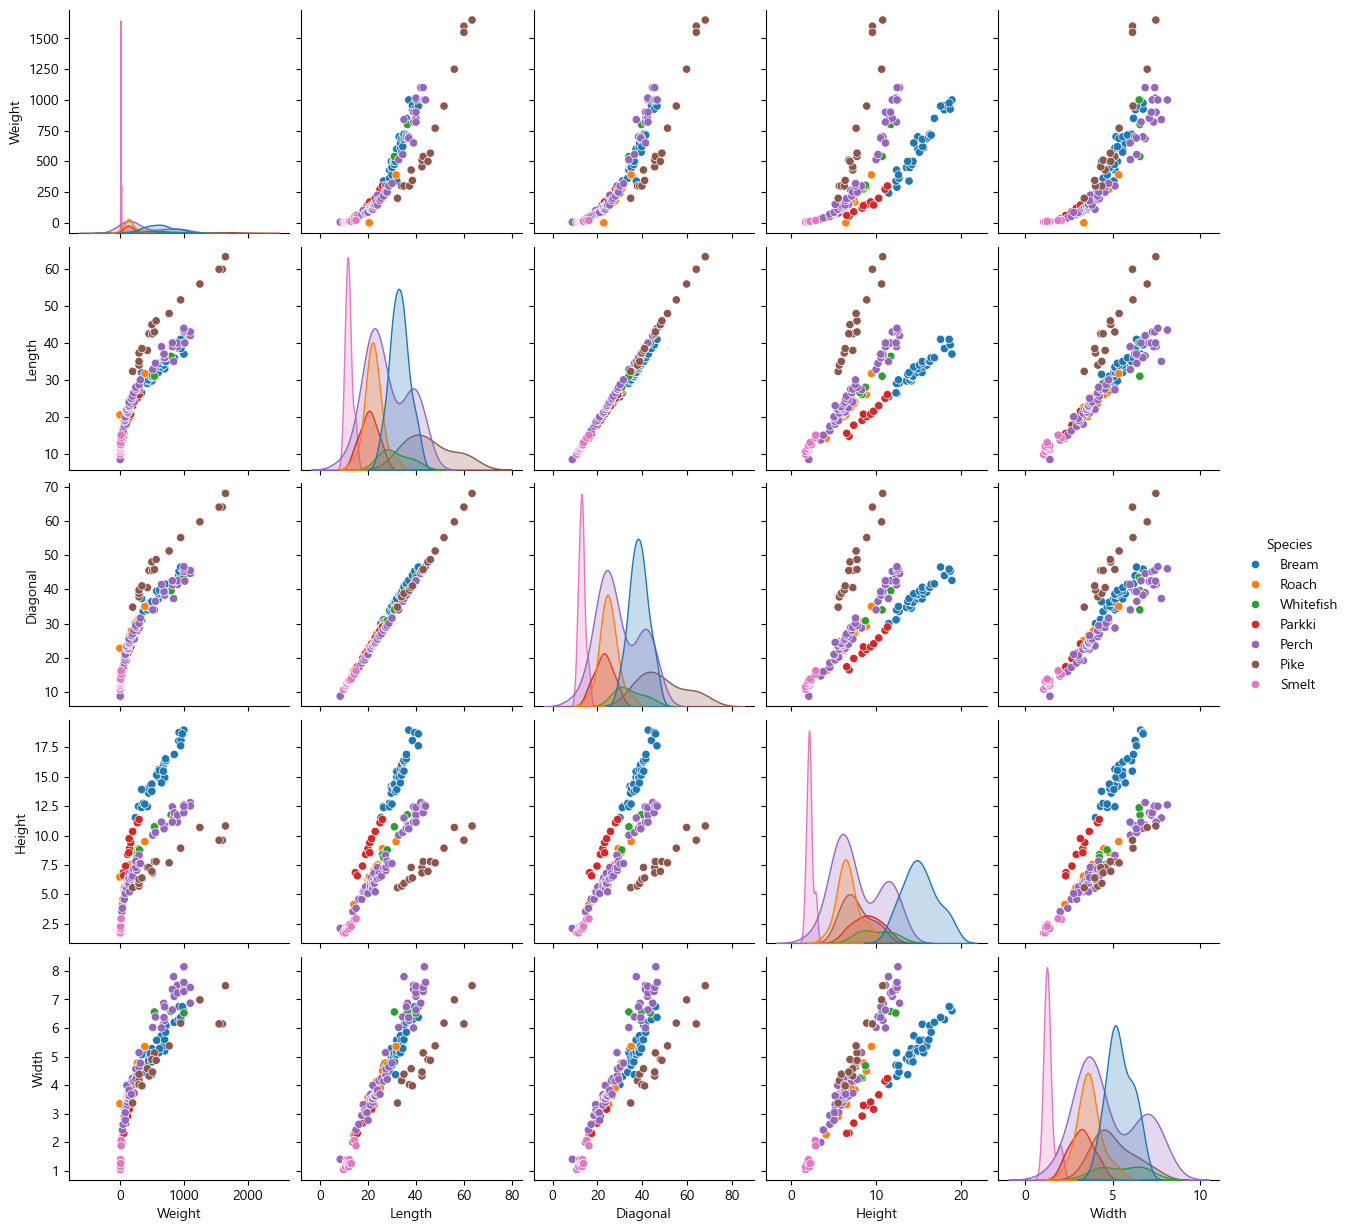

In [172]:
sns.pairplot(data=fish, hue='Species')

### 훈련 및 평가

In [177]:
# 설명 및 목표 변수 설정
X=fish.iloc[:, 1:]
Y=fish['Species']
X.shape, Y.shape

((159, 5), (159,))

In [179]:
# 학습 및 테스트 데이터 셋
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42)

# 데이터 스케일 - 표준화
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [181]:
# 로지스틱 회귀 모델 학습
lr=LogisticRegression()
lr.fit(X_train_scaled, Y_train)

print(lr.score(X_train_scaled, Y_train))
print(lr.score(X_test_scaled, Y_test))

0.8067226890756303
0.85


In [183]:
# C:L2 규제, 기본값 C=1
# L2 규제의 양 조절 alpha가 커지면 규제도 커진다.
# C는 alpha 반대로 작을수록 규제가 커진다.

lr=LogisticRegression(C=20)
lr.fit(X_train_scaled, Y_train)

print("학습:",  lr.score(X_train_scaled, Y_train))
print("일반화:", lr.score(X_test_scaled, Y_test))

학습: 0.9327731092436975
일반화: 0.925


In [185]:
# 회귀 계수 확인
print("가중치:", lr.coef_)
print("절편:", lr.intercept_)

가중치: [[-1.50605455 -1.03747913  2.60919713  7.69422738 -1.18603341]
 [ 0.19200047 -1.99988811 -3.79617725  6.50312639 -2.00022755]
 [ 3.55793539  6.36988929 -8.52233732 -5.75397234  3.79233438]
 [-0.11453308  3.61060121  3.94464503 -3.62243903 -1.7598168 ]
 [-1.40843716 -6.0924219   5.28629633 -0.86696568  1.84518454]
 [-1.33419956  1.48153393  1.38217548 -5.6602348  -4.39228962]
 [ 0.61328847 -2.33223528 -0.9037994   1.70625808  3.70084846]]
절편: [-0.10345044 -0.27281216  3.24444852 -0.1756507   2.64960026 -6.72042855
  1.37829307]


In [187]:
# z값 출력
d=lr.decision_function(X_test_scaled[:5])
np.round(d, 2)

array([[ -6.51,   1.04,   5.17,  -2.76,   3.34,   0.35,  -0.63],
       [-10.88,   1.94,   4.78,  -2.42,   2.99,   7.84,  -4.25],
       [ -4.34,  -6.24,   3.17,   6.48,   2.36,   2.43,  -3.87],
       [ -0.69,   0.45,   2.64,  -1.21,   3.26,  -5.7 ,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.13,   3.5 ,  -0.09,  -0.7 ]])

In [189]:
# 소프트 맥스 함수 
proba=softmax(d, axis=1)  # 각행의 소프트맥스 계산
np.round(proba, 3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

## 실습문제 - 피마 인디언 당뇨병
* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* Pregnancies(프레그넌시즈): 임신횟수
* Glucose(글루코스): 포도당 부하 검사 수치
* BloodPressure(블러드 프레셔): 혈압(mm Hg)
* SkinThickness (스킨 두끄): 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin(인슐린): 혈청 인슐린
* BMI: 체질량 지수
* DiabetesPedigreeFunction(다이어비티스 페디그리 펑션): 당뇨 내력 가중치 값
* Age: 나이
* Outcome(아웃컴): 클래스 결정값 (0 또는 1)

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl  
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression   
from scipy.special import expit
from scipy.special import softmax

### 데이터 전처리

In [210]:
df=pd.read_csv('./Data/supervised/diabetes.csv')  # 다이어베티스
df.shape              # (768, 9)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [212]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [214]:
df.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768,3,3,0,1,3,6,17
Glucose,768,120,31,0,99,117,140,199
BloodPressure,768,69,19,0,62,72,80,122
SkinThickness,768,20,15,0,0,23,32,99
Insulin,768,79,115,0,0,30,127,846
BMI,768,31,7,0,27,32,36,67
DiabetesPedigreeFunction,768,0,0,0,0,0,0,2
Age,768,33,11,21,24,29,41,81
Outcome,768,0,0,0,0,0,1,1


In [216]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [218]:
df['Outcome'].value_counts()   # 1이면 당뇨병 환자(양성), 0은 당뇨병이 아닌 경우(음성)

Outcome
0    500
1    268
Name: count, dtype: int64

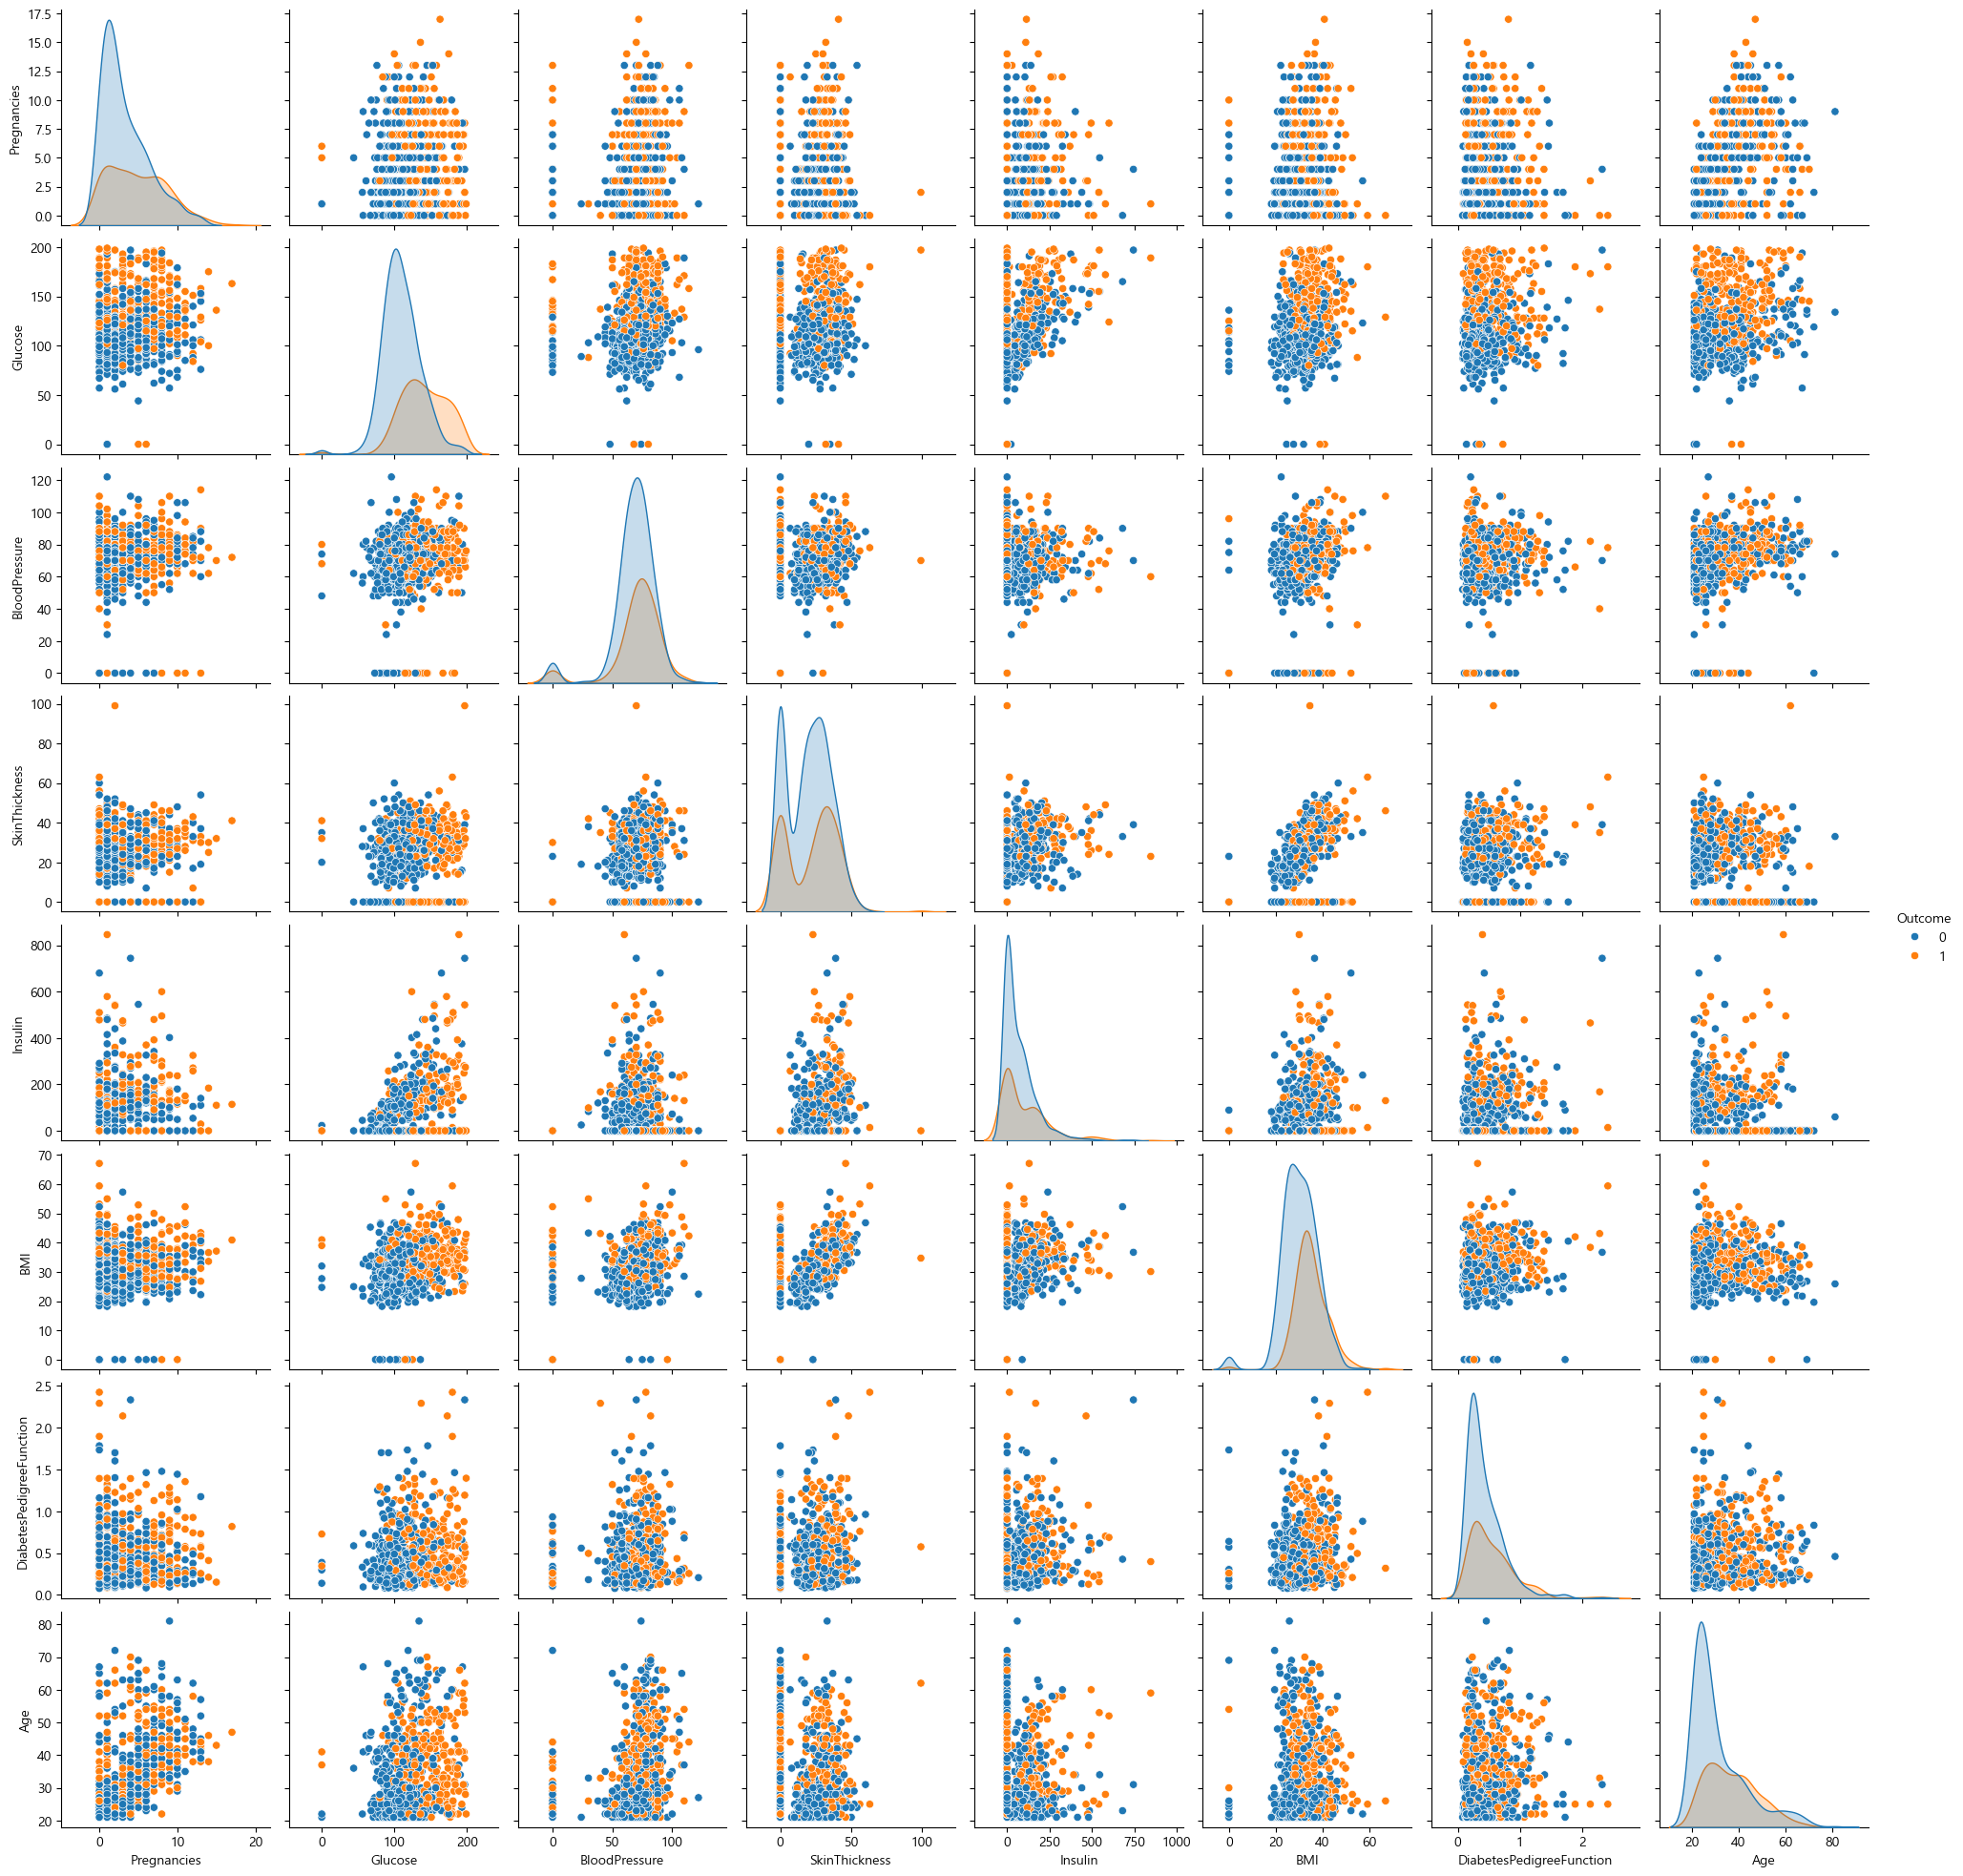

In [220]:
sns.pairplot(data=df, hue='Outcome')

In [232]:
# 상관관계
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

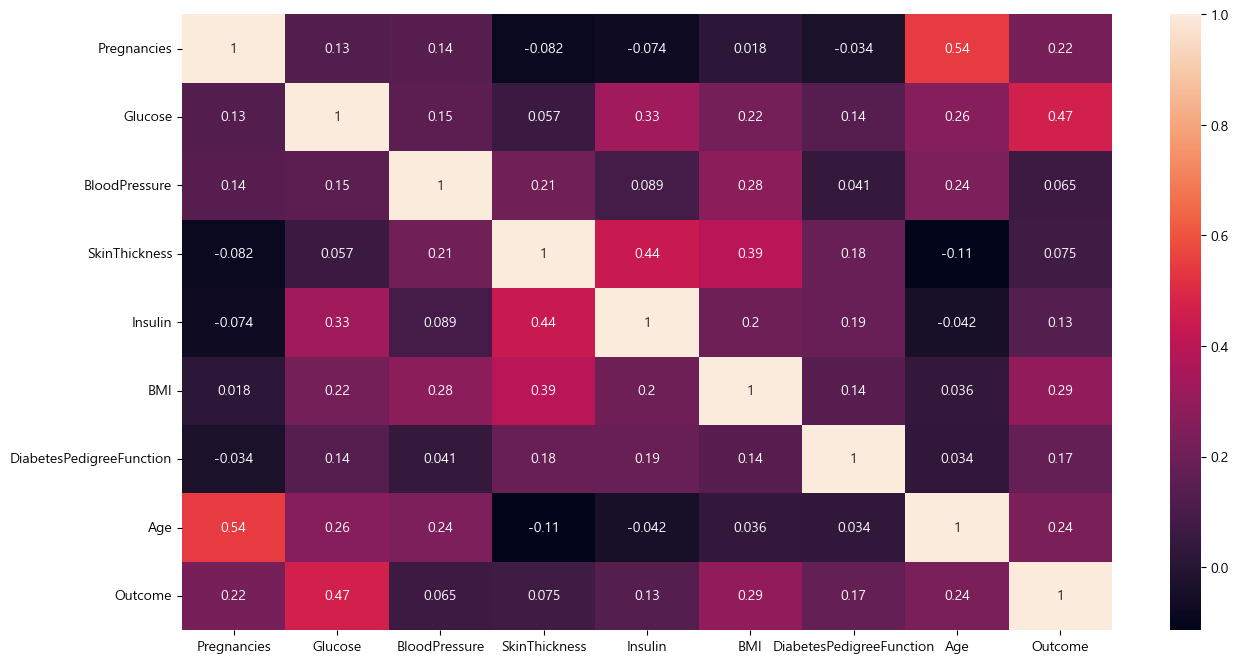

In [234]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

In [236]:
corr_df=df.corr().round(2)['Outcome'].abs()
corr_sort=corr_df.sort_values(ascending=False)
corr_sort

Outcome                     1.00
Glucose                     0.47
BMI                         0.29
Age                         0.24
Pregnancies                 0.22
DiabetesPedigreeFunction    0.17
Insulin                     0.13
BloodPressure               0.07
SkinThickness               0.07
Name: Outcome, dtype: float64

In [238]:
corr_sort.index

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies',
       'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure',
       'SkinThickness'],
      dtype='object')

In [240]:
X=df[['Glucose', 'BMI', 'Age', 'Pregnancies','DiabetesPedigreeFunction', 'Insulin']]
Y=df['Outcome']
X.shape, Y.shape

((768, 6), (768,))

### 학습 및 훈련

In [243]:
# 학습 및 데스트 데이터 셋
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42)

# 스케일 - 표준화
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 모델 학습
lr=LogisticRegression()
lr.fit(X_train_scaled, Y_train)

print("학습:", lr.score(X_train_scaled, Y_train))
print("일반화:", lr.score(X_test_scaled, Y_test))

학습: 0.7725694444444444
일반화: 0.734375


In [245]:
# 평가 지표 : 정확도, 재현율, f1, ??
Y_test_pred=lr.predict(X_test_scaled)
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       123
           1       0.63      0.62      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [247]:
# 회귀 계수 확인
print("가중치:", lr.coef_)
print("절편:", lr.intercept_)

가중치: [[ 1.10311335  0.73208695  0.38045505  0.18911578  0.17847568 -0.15156385]]
절편: [-0.89655917]


In [249]:
# z값 출력
d=lr.decision_function(X_test_scaled[:5])
d

array([-1.18172126, -1.39476924, -1.99797953, -1.4871479 ,  0.15086515])

In [251]:
# 시그모이드 함수
expit(d)

array([0.23474285, 0.19864747, 0.11941522, 0.1843502 , 0.53764491])